In [ ]:
import numpy as np
import trace_gen as tg # source code at: https://github.com/Effygal/trace-gen
import matplotlib.pyplot as plt
import heapq
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker
plt.rcParams['pdf.fonttype'] = 42 
plt.rcParams['ps.fonttype'] = 42 
plt.rcParams['image.cmap'] = 'viridis'
plt.rcParams['text.usetex']  = False
palette = sns.color_palette("deep")

In [ ]:
def sim_clock(trace):
    M = len(set(trace))
    K = M // 20
    c = np.arange(1, M, K)
    hr_clock = [tg.sim_clock(int(_c), trace, raw=True) for _c in c]
    return c, hr_clock

def sim_ran_clock_rp(trace):
    M = len(set(trace))
    K = M // 20
    c = np.arange(1, M, K)
    hr_ran_clock = [tg.sim_ran_clock(int(_c), trace, raw=True, rp=True) for _c in c]
    return c, hr_ran_clock

def sim_ran_clock_no_rp(trace):
    M = len(set(trace))
    K = M // 20
    c = np.arange(1, M, K)
    hr_ran_clock = [tg.sim_ran_clock(int(_c), trace, raw=True, rp=False) for _c in c]
    return c, hr_ran_clock

def sim_sieve(trace):
    M = len(set(trace))
    K = M // 20
    c = np.arange(1, M, K)
    hr_sieve = [tg.sim_sieve(int(_c), trace, raw=True) for _c in c]
    return c, hr_sieve

def sim_lru(trace):
    M = len(set(trace))
    K = M // 20
    c = np.arange(1, M, K)
    hr_lru = [tg.sim_lru(int(_c), trace, raw=True) for _c in c]
    return c, hr_lru

def sim_fifo(trace):
    M = len(set(trace))
    K = M // 20
    c = np.arange(1, M, K)
    hr_fifo = [tg.sim_fifo(int(_c), trace, raw=True) for _c in c]
    return c, hr_fifo

def gen_from_zipf(M, n, a):
    ranks = np.arange(1, M+1)
    p = ranks**(-a)
    p /= p.sum()
    return p, np.random.choice(M, size=n, p=p)

# def gen_from_iat(lmb, M, n): # buggy
#     lmb = np.asarray(lmb, dtype=float)
#     def sample_ird():
#         lam = np.random.choice(lmb, p=lmb)
#         # return np.random.exponential(1.0 / lam) 
#         return np.random.geometric(lam)
#     h = [(sample_ird(), i) for i in range(M)]
#     heapq.heapify(h)
#     trace = []
#     for _ in range(n):
#         t, addr = heapq.heappop(h)
#         trace.append(addr)
#         heapq.heappush(h, (t + sample_ird(), addr))
#     return np.array(trace, dtype=np.int32)
def gen_from_iat(f, M, n):
    # f(): returns a positive integer IAD sample
    h = [(f(), i) for i in range(M)]
    heapq.heapify(h)
    trace = []
    for _ in range(n):
        t, addr = heapq.heappop(h)
        trace.append(addr)
        heapq.heappush(h, (t + f(), addr))
    return np.array(trace, dtype=np.int32)

In [55]:
lmb, trace1 = gen_from_zipf(10000, 1000000, 0.65)
iads1 = tg.iad(trace1)
f = lambda: int(np.random.choice(iads1))
trace2 = gen_from_iat(f, 10000, 1000000)

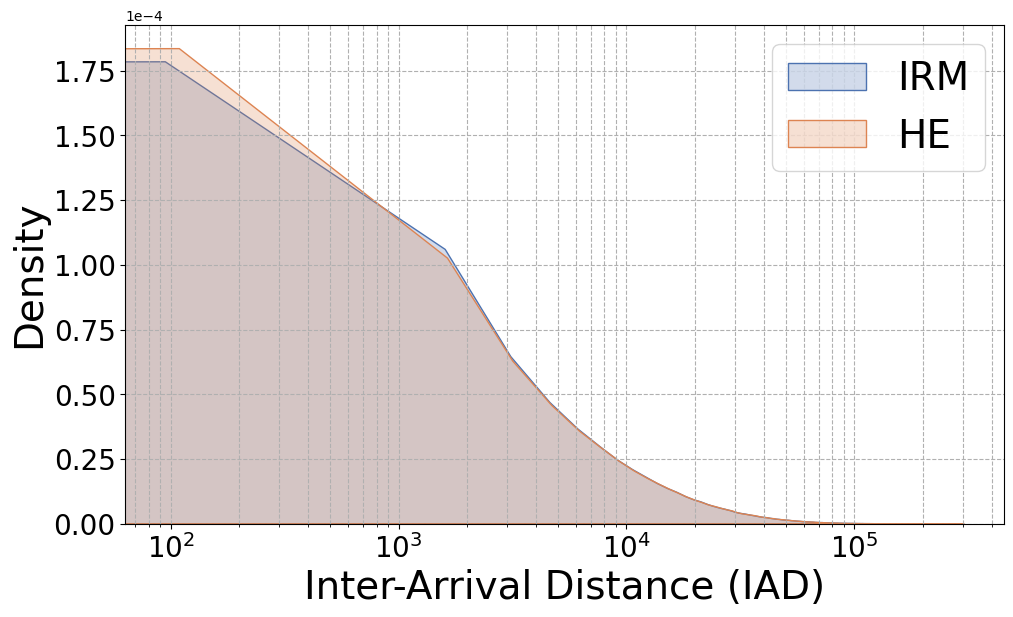

In [56]:
# iads should match
iads2 = tg.iad(trace2)
plt.figure(figsize=(10,6))
sns.kdeplot(iads1, bw_adjust=0.5, label='IRM', fill=True)
sns.kdeplot(iads2, bw_adjust=0.5, label='HE', fill=True)
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.xaxis.get_major_formatter().set_scientific(True)
ax.xaxis.get_major_formatter().set_powerlimits((-1, 1))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(True)
ax.yaxis.get_major_formatter().set_powerlimits((-1, 1))
ax.tick_params(axis='both',  labelsize=20)
plt.tight_layout()
plt.xscale('log')
plt.xlabel('Inter-Arrival Distance (IAD)', fontsize=28)
plt.ylabel('Density', fontsize=28)
plt.legend(fontsize=28)
plt.grid(True, which="both", ls="--")
plt.show()

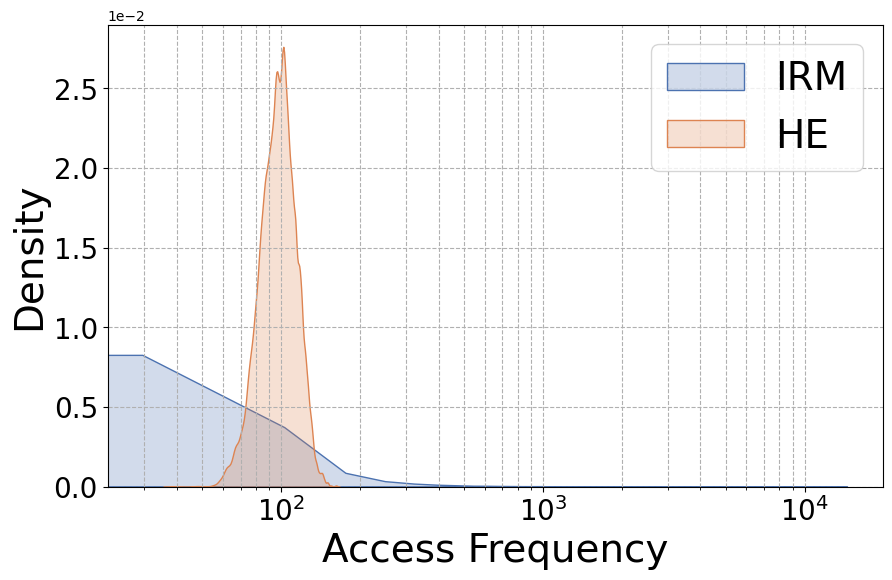

In [57]:
# frequency should not match
u1, c1 = np.unique(trace1, return_counts=True)
u2, c2 = np.unique(trace2, return_counts=True)
plt.figure(figsize=(10,6))
sns.kdeplot(c1, bw_adjust=0.5, label='IRM', fill=True)
sns.kdeplot(c2, bw_adjust=0.5, label='HE', fill=True)
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.xaxis.get_major_formatter().set_scientific(True)
ax.xaxis.get_major_formatter().set_powerlimits((-1, 1))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(True)
ax.yaxis.get_major_formatter().set_powerlimits((-1, 1))
ax.tick_params(axis='both',  labelsize=20)
plt.xscale('log')
plt.xlabel('Access Frequency', fontsize=28)
plt.ylabel('Density', fontsize=28)
plt.legend(fontsize=28)
plt.grid(True, which="both", ls="--")
plt.show()

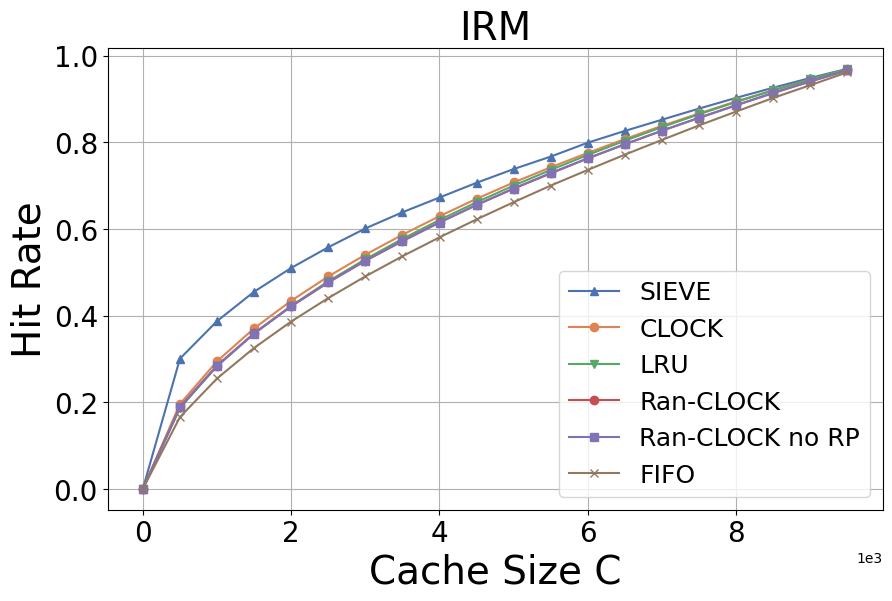

IRM Average Hit Rates:
SIEVE: 0.672172
CLOCK: 0.6342328499999998
LRU: 0.628197
Ran-CLOCK: 0.6237800499999999
Ran-CLOCK no RP: 0.6237432
FIFO: 0.59955315


In [58]:
c, hr_ran_clock = sim_ran_clock_rp(trace1)
cn, hr_ran_clock_no_rp = sim_ran_clock_no_rp(trace1)
cc, hr_clock = sim_clock(trace1)
cs, hr_sieve = sim_sieve(trace1)
cl, hr_lru = sim_lru(trace1)
cf, hr_fifo = sim_fifo(trace1)

plt.figure(figsize=(10,6))
ax = plt.gca()
ax.tick_params(axis='both', labelsize=20)
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.xaxis.get_major_formatter().set_scientific(True)
ax.xaxis.get_major_formatter().set_powerlimits((-1, 1))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(True)
ax.yaxis.get_major_formatter().set_powerlimits((-1, 1))
plt.plot(cs, hr_sieve, color=palette[0], marker='^', label='SIEVE')
plt.plot(cc, hr_clock, color=palette[1], marker='o', label='CLOCK')
plt.plot(cl, hr_lru, color=palette[2], marker='v', label='LRU')
plt.plot(c, hr_ran_clock, color=palette[3], marker='o', label='Ran-CLOCK')
plt.plot(cn, hr_ran_clock_no_rp, color=palette[4], marker='s', label='Ran-CLOCK no RP')
plt.plot(cf, hr_fifo, color=palette[5], marker='x', label='FIFO')
plt.xlabel('Cache Size C', fontsize=28)
plt.ylabel('Hit Rate', fontsize=28)
plt.legend(fontsize=18)
plt.title('IRM', fontsize=28)
plt.grid(True)
plt.show()

avgs = [('SIEVE', np.mean(np.array(hr_sieve))),
        ('CLOCK', np.mean(np.array(hr_clock))),
        ('LRU', np.mean(np.array(hr_lru))),
        ('Ran-CLOCK', np.mean(np.array(hr_ran_clock))),
        ('Ran-CLOCK no RP', np.mean(np.array(hr_ran_clock_no_rp))),
        ('FIFO', np.mean(np.array(hr_fifo)))]
avgs.sort(key=lambda x: x[1], reverse=True)
print("IRM Average Hit Rates:")
for name, avg in avgs:
    print(f"{name}: {avg}")

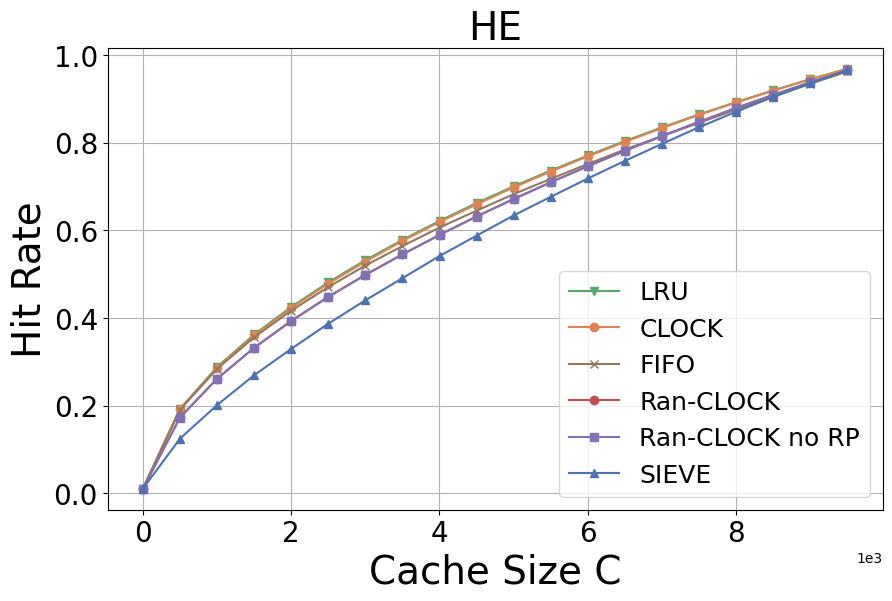

HE Average Hit Rates:
LRU: 0.6295991
CLOCK: 0.6278495499999999
FIFO: 0.61689475
Ran-CLOCK: 0.60737665
Ran-CLOCK no RP: 0.6072678
SIEVE: 0.5740223500000001


In [ ]:
c2, hr_ran_clock2 = sim_ran_clock_rp(trace2)
cn2, hr_ran_clock_no_rp2 = sim_ran_clock_no_rp(trace2)
cc2, hr_clock2 = sim_clock(trace2)
cs2, hr_sieve2 = sim_sieve(trace2)
cl2, hr_lru2 = sim_lru(trace2)
cf2, hr_fifo2 = sim_fifo(trace2)

plt.figure(figsize=(10,6))
ax = plt.gca()
ax.tick_params(axis='both', labelsize=20)
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.xaxis.get_major_formatter().set_scientific(True)
ax.xaxis.get_major_formatter().set_powerlimits((-1, 1))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(True)
ax.yaxis.get_major_formatter().set_powerlimits((-1, 1))
plt.plot(cl2, hr_lru2, color=palette[2], marker='v', label='LRU')
plt.plot(cc2, hr_clock2, color=palette[1], marker='o', label='CLOCK')
plt.plot(cf2, hr_fifo2, color=palette[5], marker='x', label='FIFO')
plt.plot(c2, hr_ran_clock2, color=palette[3], marker='o', label='Ran-CLOCK')
plt.plot(cn2, hr_ran_clock_no_rp2, color=palette[4], marker='s', label='Ran-CLOCK no RP')
plt.plot(cs2, hr_sieve2, color=palette[0], marker='^', label='SIEVE')

plt.xlabel('Cache Size C', fontsize=28)
plt.ylabel('Hit Rate', fontsize=28)
plt.legend(fontsize=18)
plt.title('HE', fontsize=28)
plt.grid(True)
plt.show()

avgs2 = [('SIEVE', np.mean(np.array(hr_sieve2))),
         ('CLOCK', np.mean(np.array(hr_clock2))),
         ('LRU', np.mean(np.array(hr_lru2))),
         ('Ran-CLOCK', np.mean(np.array(hr_ran_clock2))),
         ('Ran-CLOCK no RP', np.mean(np.array(hr_ran_clock_no_rp2))),
         ('FIFO', np.mean(np.array(hr_fifo2)))]
avgs2.sort(key=lambda x: x[1], reverse=True)
print("HE Average Hit Rates:")
for name, avg in avgs2:
    print(f"{name}: {avg}")

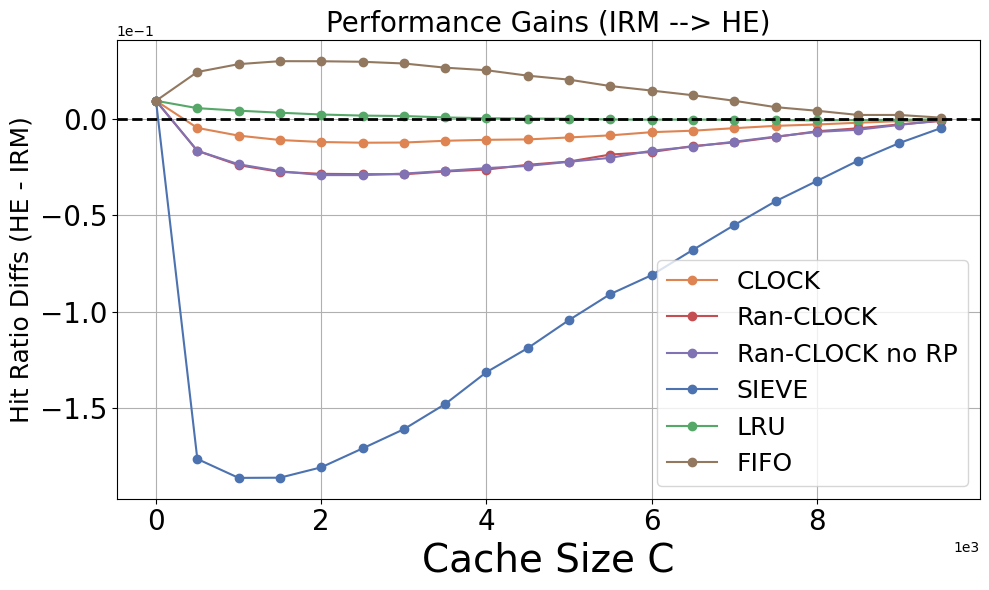

In [61]:

policies = ["CLOCK", "Ran-CLOCK", "Ran-CLOCK no RP", "SIEVE", "LRU", "FIFO"]
irm_hr = [hr_clock, hr_ran_clock, hr_ran_clock_no_rp,hr_sieve, hr_lru, hr_fifo]
he_hr  = [hr_clock2, hr_ran_clock2,  hr_ran_clock_no_rp2,hr_sieve2, hr_lru2, hr_fifo2]
colors = [palette[1], palette[3], palette[4], palette[0], palette[2], palette[5]]

rows = []
for name, irm, he in zip(policies, irm_hr, he_hr):
    irm = np.array(irm)
    he  = np.array(he)
    delta = he - irm
    for C, d in zip(c, delta):
        rows.append({"C": C, "policy": name, "delta_hr": d})

df_delta = pd.DataFrame(rows)
plt.figure(figsize=(10,6))
ax = plt.gca()
ax.tick_params(axis='both', labelsize=20)
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.xaxis.get_major_formatter().set_scientific(True)
ax.xaxis.get_major_formatter().set_powerlimits((-1, 1))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(True)
ax.yaxis.get_major_formatter().set_powerlimits((-1, 1))
for name, color in zip(policies, colors):
    sub = df_delta[df_delta["policy"] == name]
    plt.plot(sub["C"], sub["delta_hr"], marker='o', label=name, color=color)
plt.axhline(0, color='black', linewidth=2, linestyle='--')
plt.xlabel("Cache Size C", fontsize=28)
plt.ylabel("Hit Ratio Diffs (HE - IRM)", fontsize=18)
plt.title("Performance Gains (IRM --> HE)", fontsize=20)
plt.legend(fontsize=18)
plt.grid(True)
plt.tight_layout()
plt.show()


In [62]:
# Residence and reference age anaysis
clock = tg.clock(4000)
c_ref1, c_enter1, _ = clock.run_age(trace1)
c_ref2, c_enter2, _ = clock.run_age(trace2)

rclock = tg.ran_clock(4000)
rc_ref1, rc_enter1, _ = rclock.run_age(trace1, rp=True)
rc_ref2, rc_enter2, _ = rclock.run_age(trace2, rp=True)
rc_ref1_no_rp, rc_enter1_no_rp, _ = rclock.run_age(trace1, rp=False)
rc_ref2_no_rp, rc_enter2_no_rp, _ = rclock.run_age(trace2, rp=False)

from trace_gen.lru_wrapper import lru as LRU 
lru = LRU(4000)
lru_ref1, lru_enter1, _ = lru.run_age(trace1)
lru_ref2, lru_enter2, _ = lru.run_age(trace2)   

fifo = tg.fifo(4000)
fifo_enter1, _ = fifo.run_age(trace1)
fifo_enter2, _ = fifo.run_age(trace2)

sieve = tg.sieve(4000)
sieve_ref1, sieve_enter1, _ = sieve.run_age(trace1)
sieve_ref2, sieve_enter2, _ = sieve.run_age(trace2)


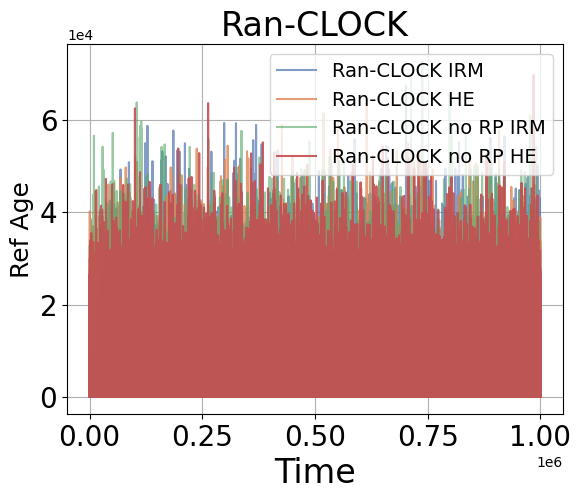

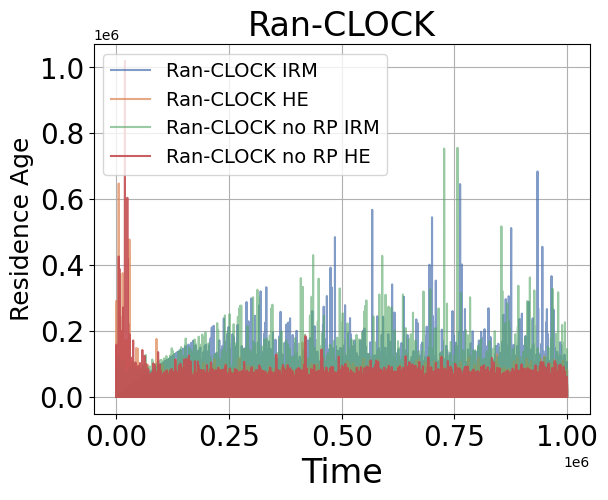

In [63]:

plt.plot(rc_ref1, alpha=0.7, label='Ran-CLOCK IRM')
plt.plot(rc_ref2, alpha=0.8, label='Ran-CLOCK HE')
plt.plot(rc_ref1_no_rp, alpha=0.6, label='Ran-CLOCK no RP IRM')
plt.plot(rc_ref2_no_rp, alpha=0.9, label='Ran-CLOCK no RP HE')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.xaxis.get_major_formatter().set_scientific(True)
ax.xaxis.get_major_formatter().set_powerlimits((-1, 1))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(True)
ax.yaxis.get_major_formatter().set_powerlimits((-1, 1))
ax.tick_params(axis='both', labelsize=20)
plt.xlabel('Time', fontsize=24)
plt.ylabel('Ref Age', fontsize=18)
plt.legend(fontsize=14)
plt.title('Ran-CLOCK', fontsize=24)
plt.grid(True)
plt.show()
plt.plot(rc_enter1, alpha=0.7, label='Ran-CLOCK IRM')
plt.plot(rc_enter2, alpha=0.7, label='Ran-CLOCK HE')
plt.plot(rc_enter1_no_rp, alpha=0.6, label='Ran-CLOCK no RP IRM')
plt.plot(rc_enter2_no_rp, alpha=0.9, label='Ran-CLOCK no RP HE')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.xaxis.get_major_formatter().set_scientific(True)
ax.xaxis.get_major_formatter().set_powerlimits((-1, 1))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(True)
ax.yaxis.get_major_formatter().set_powerlimits((-1, 1))
ax.tick_params(axis='both', labelsize=20)
plt.xlabel('Time', fontsize=24)
plt.ylabel('Residence Age', fontsize=18)
plt.legend(fontsize=14)
plt.grid(True)
plt.title('Ran-CLOCK', fontsize=24)
plt.show()

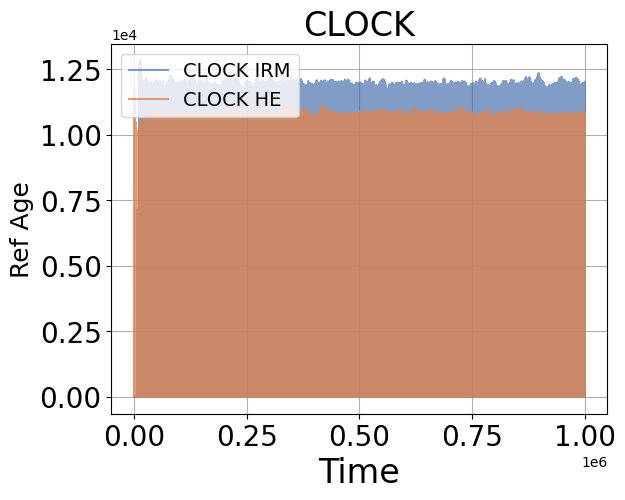

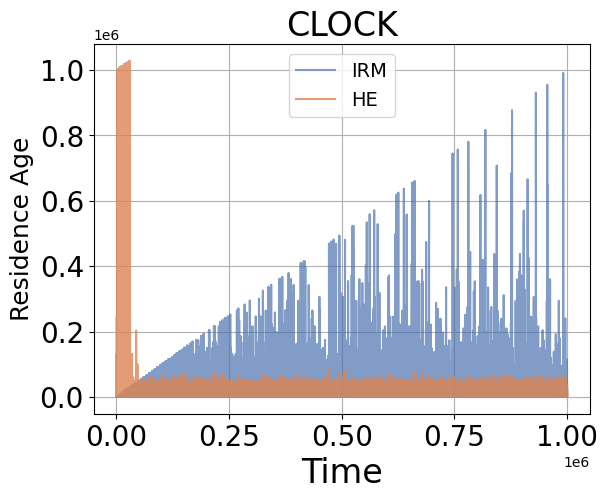

In [64]:
plt.plot(c_ref1, alpha=0.7, label='CLOCK IRM')
plt.plot(c_ref2, alpha=0.8, label='CLOCK HE')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.xaxis.get_major_formatter().set_scientific(True)
ax.xaxis.get_major_formatter().set_powerlimits((-1, 1))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(True) 
ax.yaxis.get_major_formatter().set_powerlimits((-1, 1))
ax.tick_params(axis='both', labelsize=20)
plt.xlabel('Time', fontsize=24)
plt.ylabel('Ref Age', fontsize=18)
plt.legend(fontsize=14)
plt.title('CLOCK', fontsize=24)
plt.grid(True)
plt.show()

plt.plot(c_enter1, alpha=0.7, label='IRM')
plt.plot(c_enter2, alpha=0.8, label='HE')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.xaxis.get_major_formatter().set_scientific(True) 
ax.xaxis.get_major_formatter().set_powerlimits((-1, 1))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(True) 
ax.yaxis.get_major_formatter().set_powerlimits((-1, 1))
ax.tick_params(axis='both', labelsize=20)
plt.xlabel('Time', fontsize=24)
plt.ylabel('Residence Age', fontsize=18)
plt.legend(fontsize=14)
plt.title('CLOCK', fontsize=24)
plt.grid(True)
plt.show()

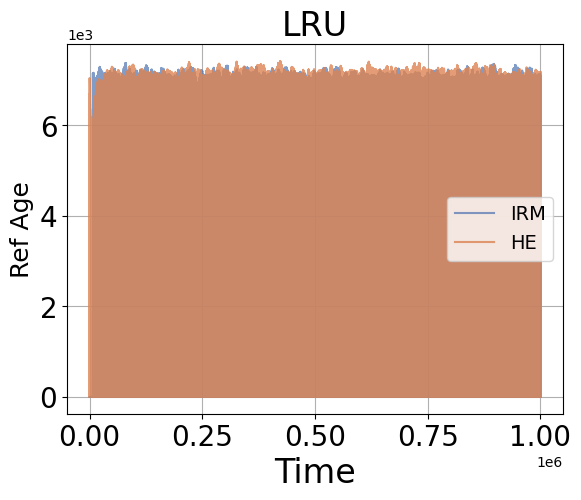

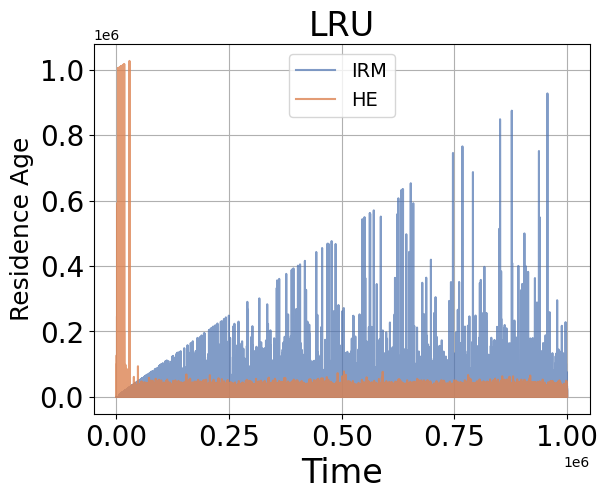

In [65]:
plt.plot(lru_ref1, alpha=0.7, label='IRM')
plt.plot(lru_ref2, alpha=0.8, label='HE')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.xaxis.get_major_formatter().set_scientific(True)
ax.xaxis.get_major_formatter().set_powerlimits((-1, 1))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(True) 
ax.yaxis.get_major_formatter().set_powerlimits((-1, 1))
ax.tick_params(axis='both', labelsize=20)
plt.xlabel('Time', fontsize=24)
plt.ylabel('Ref Age', fontsize=18)
plt.legend(fontsize=14)
plt.title('LRU', fontsize=24)
plt.grid(True)
plt.show()

plt.plot(lru_enter1, alpha=0.7, label='IRM')
plt.plot(lru_enter2, alpha=0.8, label='HE')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.xaxis.get_major_formatter().set_scientific(True)
ax.xaxis.get_major_formatter().set_powerlimits((-1, 1))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(True)
ax.yaxis.get_major_formatter().set_powerlimits((-1, 1))
ax.tick_params(axis='both', labelsize=20)
plt.xlabel('Time', fontsize=24)
plt.ylabel('Residence Age', fontsize=18)
plt.legend(fontsize=14)
plt.title('LRU', fontsize=24)
plt.grid(True)
plt.show()

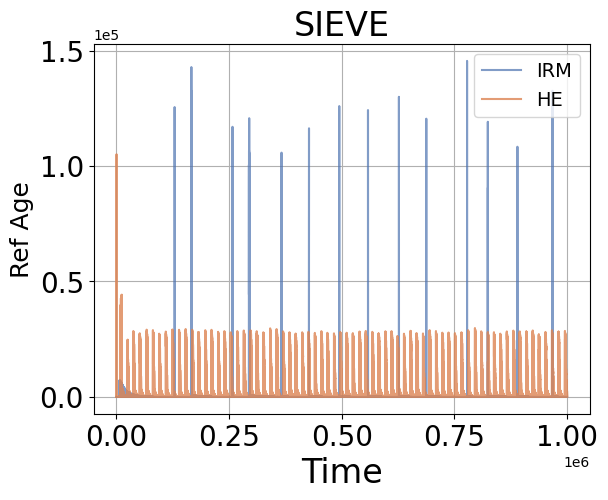

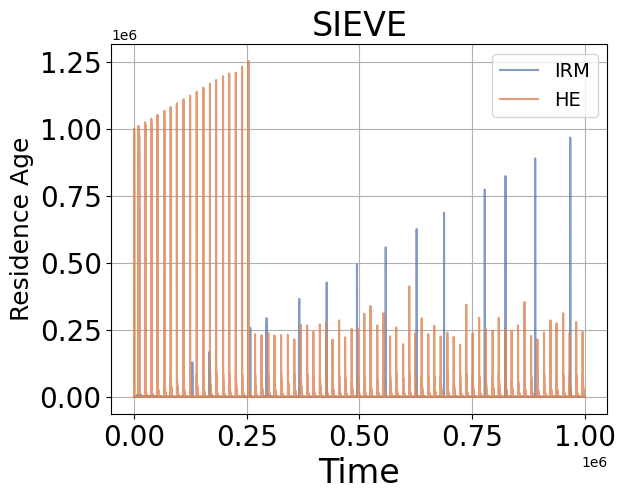

In [66]:
plt.plot(sieve_ref1, alpha=0.7, label='IRM')
plt.plot(sieve_ref2, alpha=0.8, label='HE')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.xaxis.get_major_formatter().set_scientific(True)
ax.xaxis.get_major_formatter().set_powerlimits((-1, 1))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(True)
ax.yaxis.get_major_formatter().set_powerlimits((-1, 1))
ax.tick_params(axis='both', labelsize=20)
plt.xlabel('Time', fontsize=24)
plt.ylabel('Ref Age', fontsize=18)
plt.legend(fontsize=14)
plt.title('SIEVE', fontsize=24)
plt.grid(True)
plt.show()

plt.plot(sieve_enter1, alpha=0.7, label='IRM')
plt.plot(sieve_enter2, alpha=0.8, label='HE')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.xaxis.get_major_formatter().set_scientific(True)
ax.xaxis.get_major_formatter().set_powerlimits((-1, 1))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(True)
ax.yaxis.get_major_formatter().set_powerlimits((-1, 1))
ax.tick_params(axis='both', labelsize=20)
plt.xlabel('Time', fontsize=24)
plt.ylabel('Residence Age', fontsize=18)
plt.legend(fontsize=14)
plt.title('SIEVE', fontsize=24)
plt.grid(True)
plt.show()